#  8. Morfologické operácie

In [1]:
import numpy as np
from skimage import data, filters, draw
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import disk
from scipy.signal import convolve2d
import cv2

In [2]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

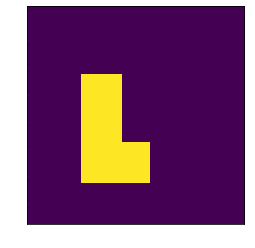

In [3]:
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I
plt.imshow(I)

In [4]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
SE_o = np.array([2, 0])

In [5]:
eroded_I = np.zeros(I.shape)
dilated_I = np.zeros(I.shape)
I = np.pad(I,
           ((SE_o[0], SE_o[0]),(SE_o[1],SE_o[1])),
           mode='constant',
           constant_values=((False, False), (False, False)))

In [6]:
for i in range(SE_o[0], I.shape[0] - SE_o[0]):
    for j in range(SE_o[1], I.shape[1]- SE_o[1]):
        crop = I[i-SE_o[0]: i-SE_o[0]+SE.shape[0], j-SE_o[1]:j-SE_o[1]+SE.shape[1]]

        and_result = np.logical_and(crop,
                                    SE)
        erosion_test = np.sum(and_result) == np.sum(SE)
        dilation_test = np.sum(and_result) > 0

        eroded_I[i-SE_o[0],j-SE_o[1]] = erosion_test

        dilated_I[i-SE_o[0],j-SE_o[1]] = dilation_test

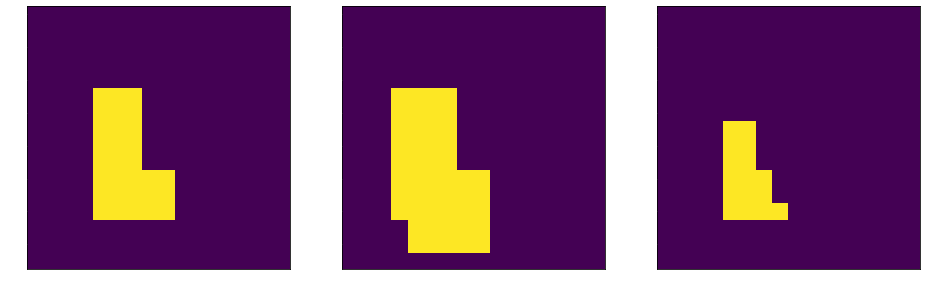

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(backup)
plt.subplot(132)
plt.imshow(dilated_I)
plt.subplot(133)
plt.imshow(eroded_I)

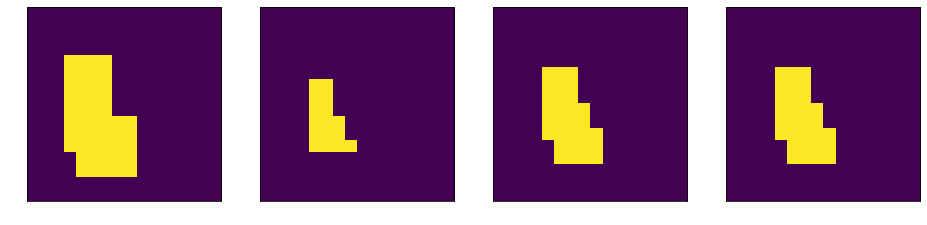

In [8]:
from skimage import morphology
#selem = morphology.selem.rectangle(3,2)

dilated_I = morphology.dilation(backup,SE)
eroded_I = morphology.erosion(backup,SE)
closed_I = morphology.closing(backup,SE)
open_I = morphology.opening(backup,SE)
plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(dilated_I)
plt.subplot(142)
plt.imshow(eroded_I)
plt.subplot(143)
plt.imshow(closed_I)
plt.subplot(144)
plt.imshow(open_I)

## Real world problem

Text(0.5, 1.0, 'Otsu thresh binary mask base on blue channel')

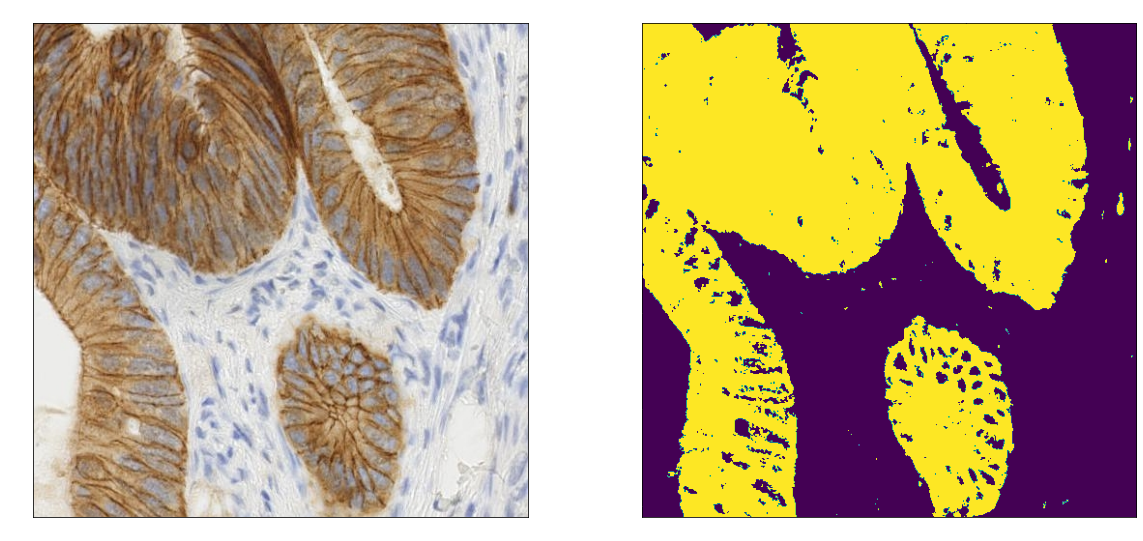

In [9]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(I3)
plt.title('Image')
plt.subplot(222)
B = I3[:,:,2]
out  = filters.threshold_otsu(B)
mask = B<out
plt.imshow(mask)
plt.title('Otsu thresh binary mask base on blue channel')

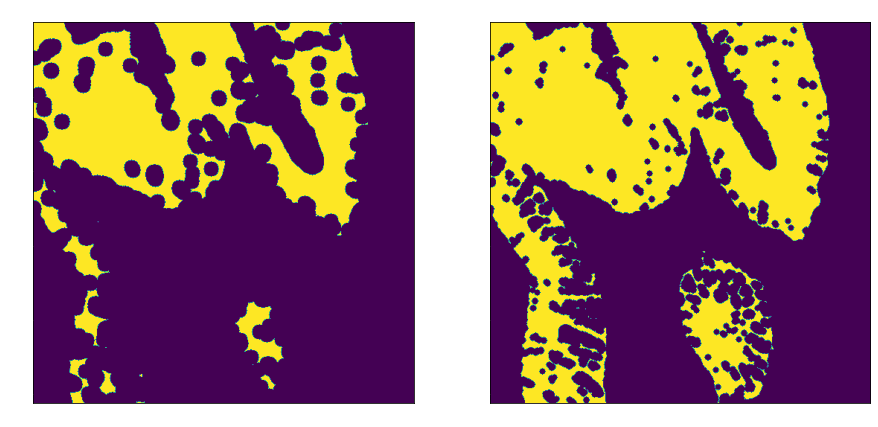

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Erosion 10 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Erosion 4 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(4)))

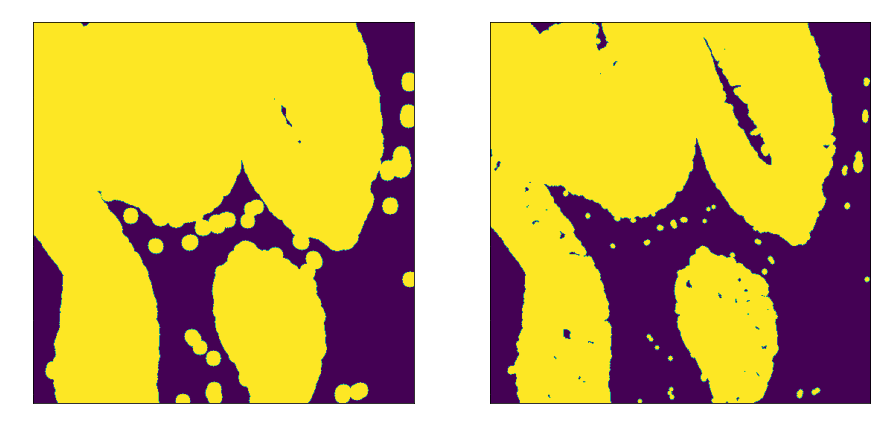

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Dilation 10 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Dilation 2 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(3)))

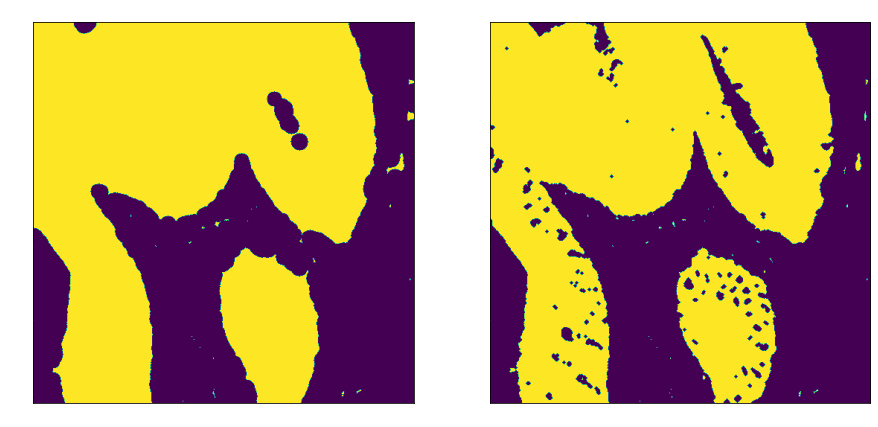

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Closing 10 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Closing 2 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(2)))

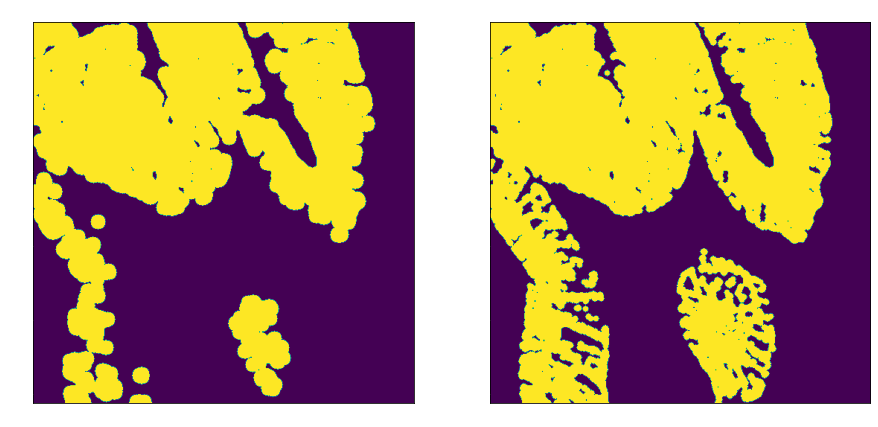

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Opening 10 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Opening 2 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(4)))

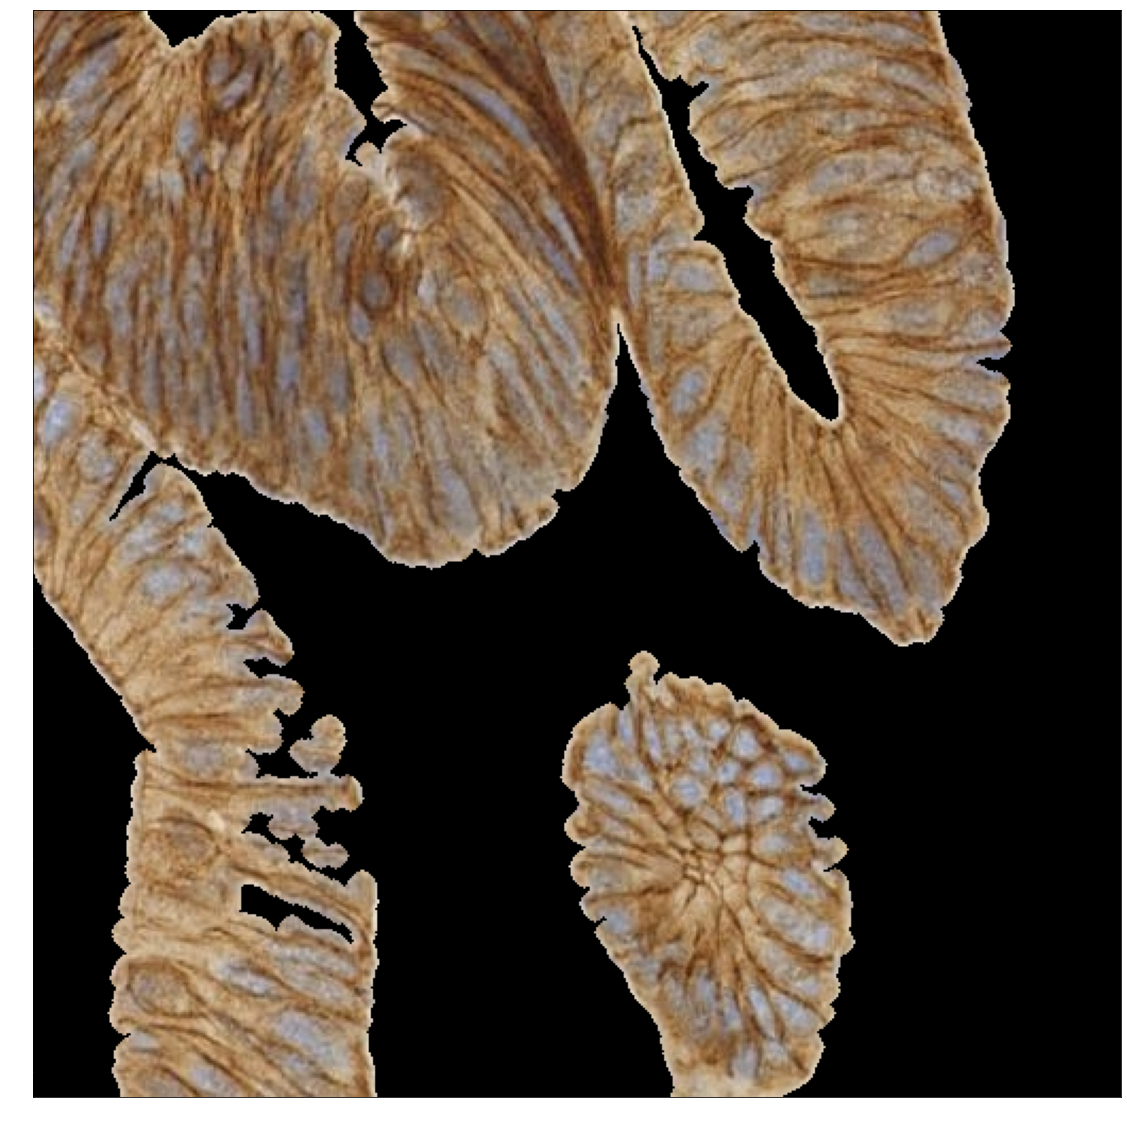

In [14]:
plt.figure(figsize=(20, 20))
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(mask,morphology.disk(4)),morphology.disk(2)),256)
plt.imshow(I3 * np.dstack((mask_final,mask_final,mask_final)),cmap='gray')

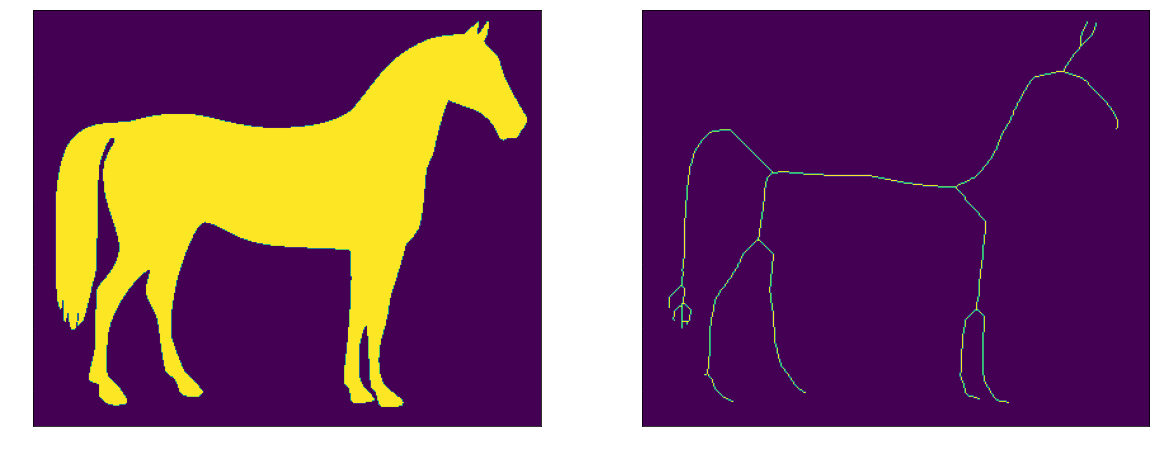

In [15]:
plt.figure(figsize=(20,15))
I = data.horse() == False
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(morphology.skeletonize(I))

# Dokoncit cvicenie  54 - 57

<ipython-input-16-4c434e3cad1e>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  I_gray = rgb2gray(I)*255


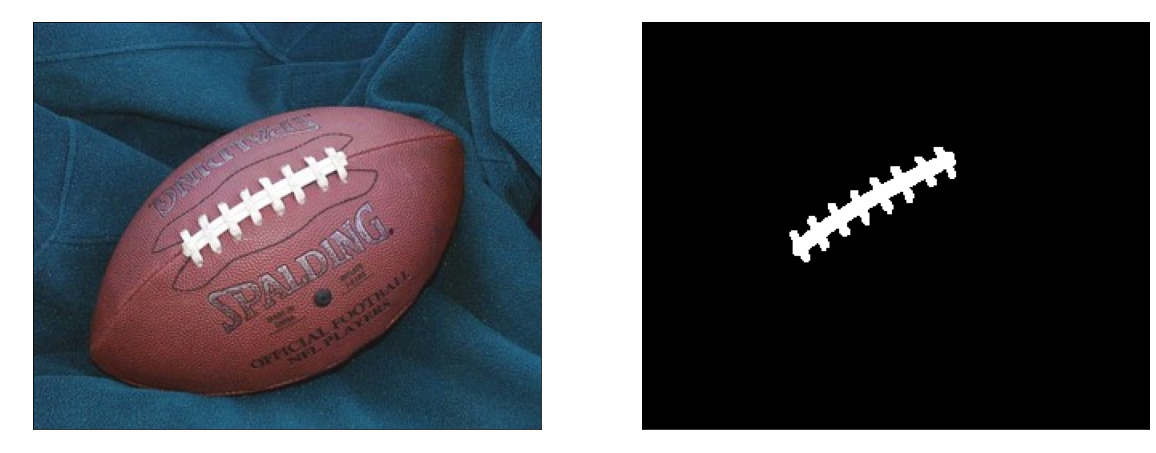

In [16]:
I = plt.imread('imgs/football.png')
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Povodny obrazok')
plt.imshow(I)

plt.subplot(122)
plt.title('BW')
I_gray = rgb2gray(I)*255
I_gray = I_gray.astype(dtype=np.uint8)
I_gray = I_gray > 170
I1 = morphology.opening(I_gray, morphology.selem.square(3))
plt.imshow(I1, cmap='gray')

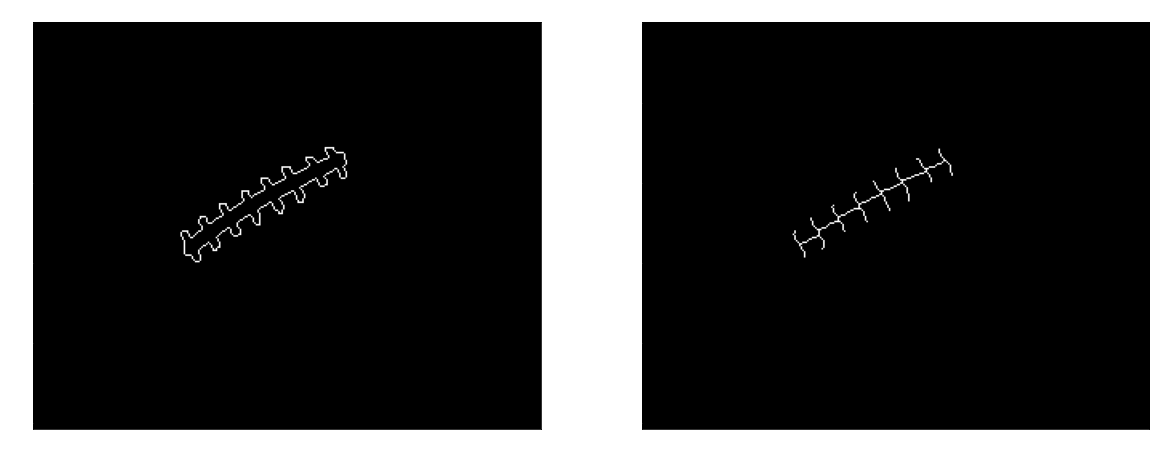

In [17]:
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('BW - erozia')
I2 = np.logical_xor(I1, morphology.erosion(I1, morphology.selem.disk(1)))
plt.imshow(I2, cmap='gray')

plt.subplot(122)
plt.title('Skeleton')
I3 = morphology.skeletonize(I1)
plt.imshow(I3, cmap='gray')

In [18]:
def magic(n):
  n = int(n)
  if n < 3:
    raise ValueError("Size must be at least 3")
  if n % 2 == 1:
    p = np.arange(1, n+1)
    return n*np.mod(p[:, None] + p - (n+3)//2, n) + np.mod(p[:, None] + 2*p-2, n) + 1
  elif n % 4 == 0:
    J = np.mod(np.arange(1, n+1), 4) // 2
    K = J[:, None] == J
    M = np.arange(1, n*n+1, n)[:, None] + np.arange(n)
    M[K] = n*n + 1 - M[K]
  else:
    p = n//2
    M = magic(p)
    M = np.block([[M, M+2*p*p], [M+3*p*p, M+p*p]])
    i = np.arange(p)
    k = (n-2)//4
    j = np.concatenate((np.arange(k), np.arange(n-k+1, n)))
    M[np.ix_(np.concatenate((i, i+p)), j)] = M[np.ix_(np.concatenate((i+p, i)), j)]
    M[np.ix_([k, k+p], [0, k])] = M[np.ix_([k+p, k], [0, k])]
  return M


SE = np.array([[1, 0],[1, 0],[1, 1]])
I = magic(5)

II1 = morphology.dilation(I, SE)
print(II1)
print()
II2 = morphology.erosion(I, SE)
print(II2)

[[23 24 14 16 16]
 [23 24 20 22 22]
 [23 19 21 21 22]
 [18 25 25 21 22]
 [18 25 25 21  9]]

[[ 5  5  1  8 15]
 [ 4  5  1  8 15]
 [ 4  5  7  3  3]
 [ 4  6  2  2  3]
 [10 12  2  2  3]]


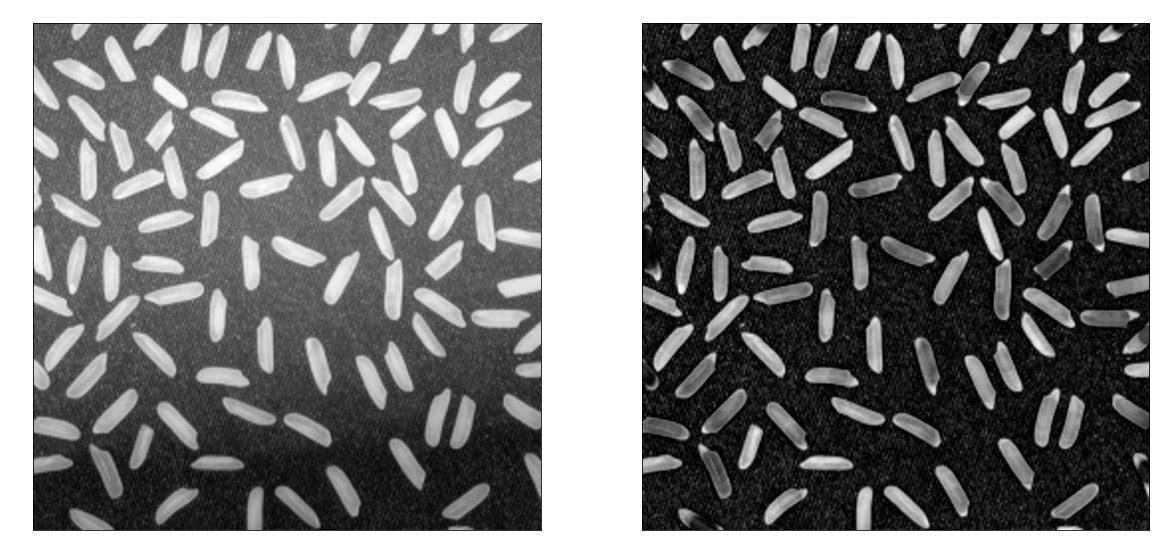

In [19]:
img = plt.imread('imgs/rice.jpg')
img = rgb2gray(img)
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Povodny')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('Oddelene pozadie')
background = morphology.opening(img , morphology.selem.disk(15))
I1 = img - background
plt.imshow(I1, cmap='gray')

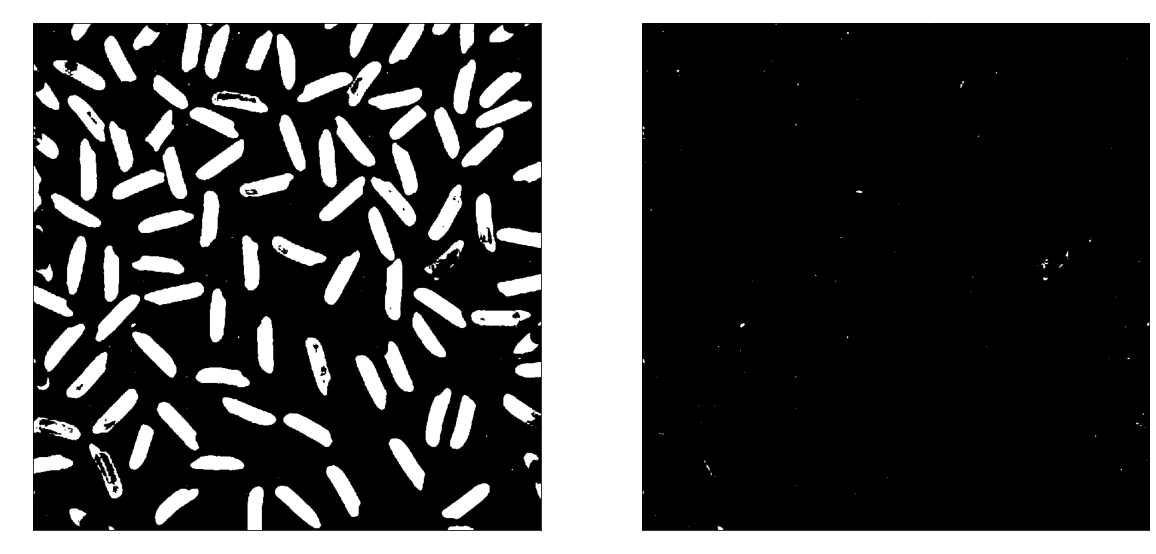

In [26]:
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.title('Prahovany obrazok')
thresh = filters.threshold_otsu(I1)
I2 = I1 > thresh
plt.imshow(I2, cmap = 'gray')

plt.subplot(122)
plt.title('Pixely zmenene bwareaopen')
I3 = morphology.remove_small_objects(I2, min_size=50)
plt.imshow(np.logical_xor(I3, I2), cmap = 'gray')

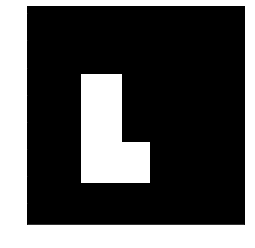

In [21]:
Img = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=Img.shape)
Img[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=Img.shape)
Img[rr, cc] = True
backup = Img
plt.imshow(Img, cmap='gray')

SE = np.array([[1, 0],[1, 0],[1, 1]])
#print(SE)

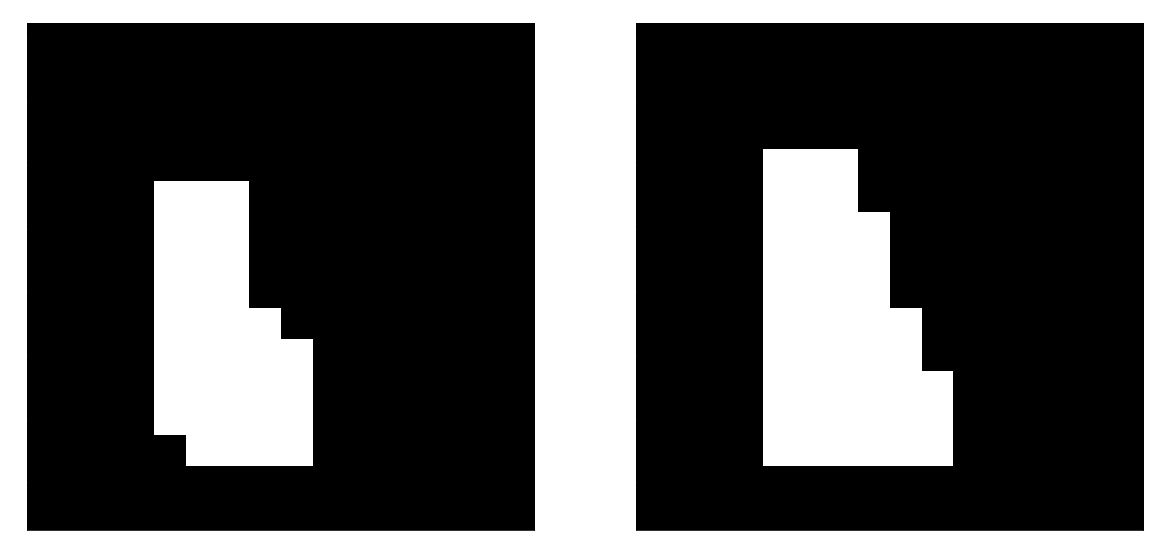

In [31]:
plt.figure (figsize=(20,20))

plt.subplot(121)
plt.title("Erosion")
#kernel = np.ones((5, 5), np.uint8)
#erosion_n = cv2.erode(Img, kernel, iterations = 1)
plt.imshow(convolve2d(Img, SE, mode='same') > 1, cmap='gray')

plt.subplot(122)
plt.title("Dilatation")
#kernel = np.ones((6, 6), np.uint8)
#dilation_n = cv2.dilate(Img, kernel )
plt.imshow(convolve2d(Img, SE, mode='same') > 0, cmap='gray')